## Intro

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

from svm_margin_plot import plot_svm_boundary

In [2]:
data = pd.read_csv('SVM_Data.csv')

In [3]:
data.head()     # 1 -> sick
                # 0 -> not sick

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


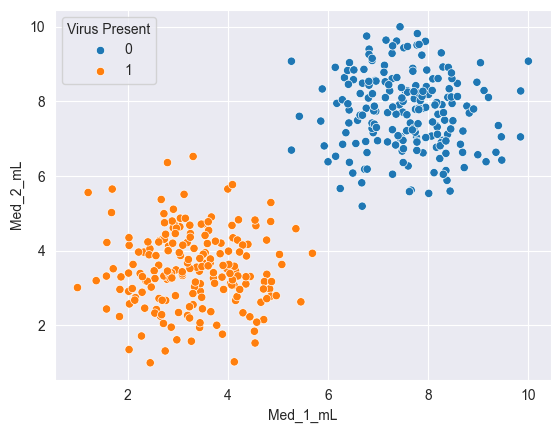

In [4]:
sns.scatterplot(data, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')
plt.show()

In [5]:
# split data into feature and target

x = data.drop('Virus Present', axis=1)
y = data['Virus Present']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

# shuffle : بيلغبط الداتا خصوصا لو هيا binary

## Linear SVM

In [7]:
# load model
model = SVC(kernel='linear')

In [8]:
# training
model.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [9]:
y_pred = model.predict(x_test)

In [10]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


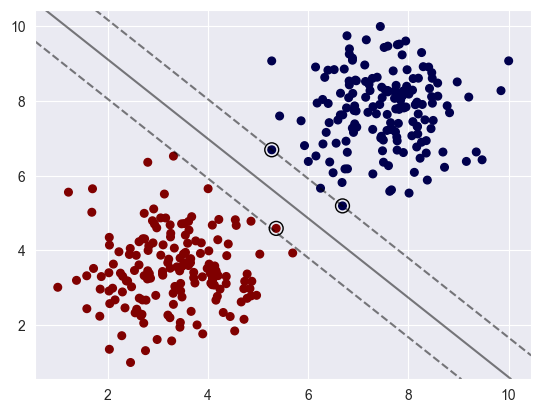

In [11]:
plot_svm_boundary(model, x_train, y_train )

## Polynomial SVM

In [12]:
# load model
model_poly = SVC(kernel='poly', degree=20)
# training
model_poly.fit(x_train, y_train)

,C,1.0
,kernel,'poly'
,degree,20
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


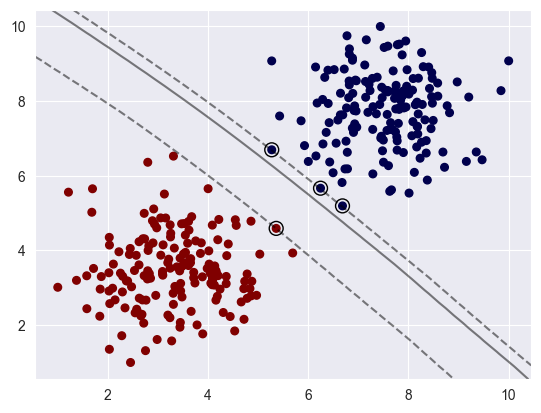

In [13]:
plot_svm_boundary(model_poly, x_train, y_train)

## rbf SVM

In [14]:
model_rbf = SVC(kernel='rbf', gamma=0.1)

In [15]:
model_rbf.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


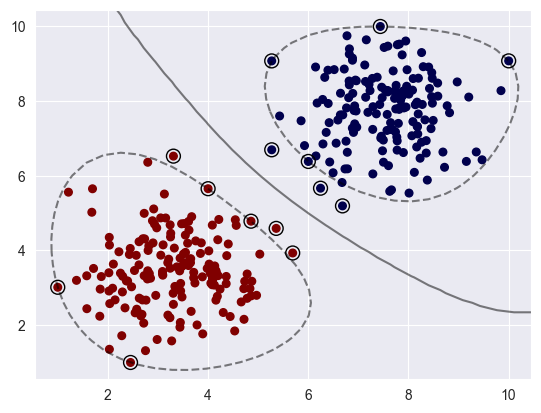

In [16]:
plot_svm_boundary(model_rbf, x_train, y_train)

## Grid_Search

In [17]:
model = SVC()

parameter = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [1, .1, .01, 100, 10],
    'gamma': [.01, .1, 1, 10, 1],
    'degree': [2, 3, 4, 6, 8]
}


grid = GridSearchCV(model, parameter)

In [18]:
grid.fit(x_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [1, 0.1, ...], 'degree': [2, 3, ...], 'gamma': [0.01, 0.1, ...], 'kernel': ['linear', 'poly', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [19]:
grid.best_estimator_  # احسن مودل

,C,1
,kernel,'linear'
,degree,2
,gamma,0.01
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
# the best svc model using best parameters
best_model = SVC(C=1, degree=2, gamma=0.01, kernel='linear')

In [21]:
best_model.fit(x_train, y_train)

,C,1
,kernel,'linear'
,degree,2
,gamma,0.01
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [22]:
y_pred = best_model.predict(x_test)

C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


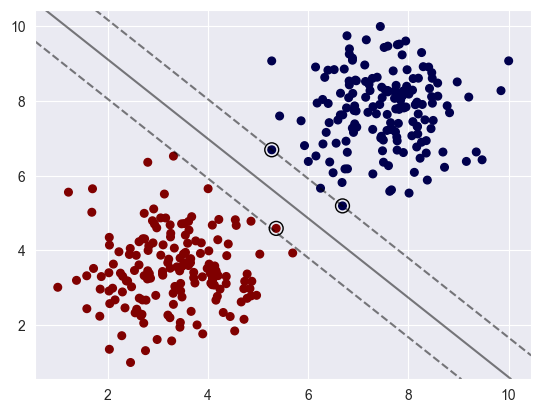

In [23]:
plot_svm_boundary(best_model, x_train, y_train)